In [1]:
image_path = '/home/tli_project/Desktop/Data/T4/neurons/220219_P48_N1/220219_P48_N1_seg3_shifted_FlipV_R15_seg2.tif'
cols_path = '/home/tli_project/Desktop/Data/T4/neurons/220219_P48_N1/220219_P48_N1_seg3_shifted_FlipV_R15.tif'
save_path = '/home/tli_project/Desktop/Data/T4/neurons/220219_P48_N1/output/'
save_name = '220219_P48_N1_shifted_FlipV_R15'

##
start_age = 36
entry_point = (0,38,185,225) #entry point of the neuron (T,Z,Y,X), where Z=0
stab_limit = 5 #(No. of timepoints for stable branches calculation)
nor_fact = 1 #this is for normalizing Col_occpancy. for now there is no other option, like neuron max

if save_path[-1] != '/':
    save_path += '/'

In [2]:
#imports
import utils.analysis as analysis
import matplotlib.pyplot as plt
import tifffile as tif
import numpy as np
from tqdm import tqdm
import pandas as pd

In [3]:
neuron = tif.imread(image_path)
Cols = tif.imread(cols_path)
## you might want to subset either neuron, Columns or both
# neuron = neuron[:,:40]


In [4]:
# make all images binary
neuron[neuron != 0] = 1
Cols = Cols - Cols.min()
Cols[Cols!=0] = 1 

In [6]:
# run this if you already calculated stable_neuron
# stable_n = tif.imread(stable_path)

# or calculate stable pixels with the following command
lifetimes = analysis.cal_lifetimes(neuron, save=False, 
                                    save_path=save_path, save_file=save_name, 
                                    xy_pixel=0.076, z_pixel=0.4)
stable_neuron = analysis.stable_N(lifetimes, stab_limit=stab_limit, save=False, 
                                    save_path=save_path, save_file=save_name, 
                                    xy_pixel=0.076, z_pixel=0.4)

stable_neuron[stable_neuron !=0] = 1

# in case you want to save the neuron
stable_neuron = stable_neuron.astype('uint16')
tif.imwrite(save_path+'stable'+save_name, stable_neuron, imagej=True, resolution=(1./0.076, 1./0.076),
                metadata={'spacing': 0.4, 'unit': 'um', 'finterval': 1/10,'axes': 'TZYX'})

100%|██████████| 84/84 [00:01<00:00, 48.83it/s]


In [35]:
# stable_neuron[stable_neuron !=0] = 1
# transient = neuron - stable_neuron
# tif.imwrite(save_path+'trans'+save_name, transient, imagej=True, resolution=(1./0.076, 1./0.076),
#                 metadata={'spacing': 0.4, 'unit': 'um', 'finterval': 1/10,'axes': 'TZYX'})

In [7]:
tif.imwrite(save_path+'all'+save_name, neuron, imagej=True, resolution=(1./0.076, 1./0.076),
                metadata={'spacing': 0.4, 'unit': 'um', 'finterval': 1/10,'axes': 'TZYX'})

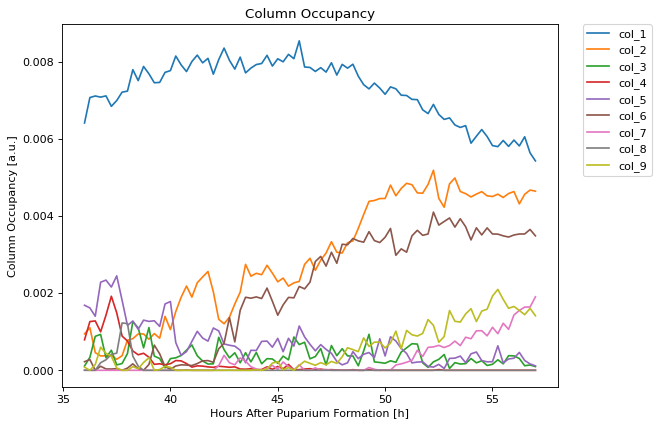

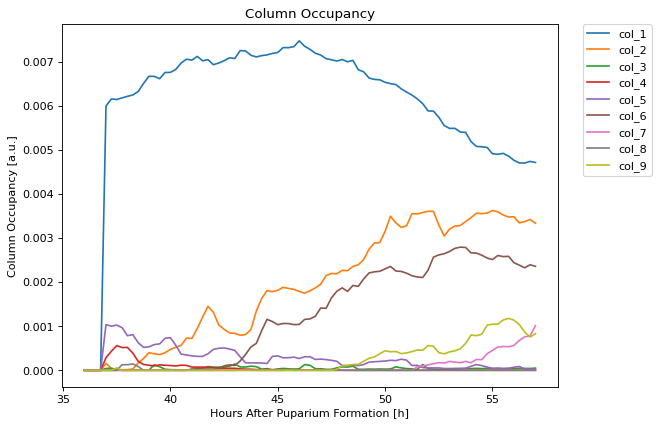

In [8]:
# calculate columns' occupancy
# define the neuron and saving name
cols_hist = analysis.col_occupancy(neuron, Cols, nor_fact=nor_fact, 
                                    start_t=start_age, 
                                    plot=True, save=True, 
                                    save_path=save_path, 
                                    save_file='all_px_'+save_name)

cols_hist = analysis.col_occupancy(stable_neuron, Cols, nor_fact=nor_fact, 
                                    start_t=start_age, 
                                    plot=True, save=True, 
                                    save_path=save_path, 
                                    save_file='stab_px_'+save_name)

In [9]:
lifetimes = analysis.cal_lifetimes(neuron, save=False, 
                                    save_path=save_path, save_file=save_name, 
                                    xy_pixel=0.076, z_pixel=0.4)
stable_neuron = analysis.stable_N(lifetimes, stab_limit=stab_limit, save=False, 
                                    save_path=save_path, save_file=save_name, 
                                    xy_pixel=0.076, z_pixel=0.4)
output_results = analysis.N_volume(neuron, stable_neuron, normalize=False, 
                                start_t=start_age, plot=False, 
                                save=True, save_path=save_path, 
                                save_file='Vol_'+save_name)
vol_all = lifetimes.copy()
vol_all[vol_all > 0] = 1
output_results['vol_all1'] = vol_all.sum(axis=(1,2,3))
output_results['growthR_stable'] = output_results.vol_stable.diff()/output_results.vol_stable
output_results['trans_per'] = (output_results.vol_all - output_results.vol_stable)/output_results.vol_stable
DGIs = analysis.calculate_DGI(entry_point, neuron, 
                                start_t=start_age, 
                                save=True, save_path='', 
                                save_file='')
output_results = pd.merge(output_results, DGIs, on='timepoints')
output_file = save_path+save_name+'_output.csv'
output_file = output_file.replace('.tif','')
output_results.to_csv(output_file, sep=';')

100%|██████████| 84/84 [00:01<00:00, 48.90it/s]
/home/tli_project/Desktop/TLI_preprocessing/Work_folder/steps/utils/analysis.py:180: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DGIs = DGIs.append(pd.DataFrame(Info,
/home/tli_project/Desktop/TLI_preprocessing/Work_folder/steps/utils/analysis.py:180: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DGIs = DGIs.append(pd.DataFrame(Info,
/home/tli_project/Desktop/TLI_preprocessing/Work_folder/steps/utils/analysis.py:180: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DGIs = DGIs.append(pd.DataFrame(Info,
/home/tli_project/Desktop/TLI_preprocessing/Work_folder/steps/utils/analysis.py:180: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

In [10]:
output_results.head()

,timepoints,vol_all,vol_stable,vol_all1,growthR_stable,trans_per,Ori Vec_Y,Ori Vec_X,Ori Vec Length,DGI
0,36.0,154137,0.0,154137.0,NaN,inf,-278574.0,-1034216.0,1071077.125202,0.190331
1,36.25,172672,0.0,172672.0,NaN,inf,-803444.0,-1168036.0,1417684.858645,0.231552
2,36.5,174860,0.0,174860.0,NaN,inf,-1479673.0,-1040345.0,1808797.91739,0.276241
3,36.75,193473,0.0,193473.0,NaN,inf,-1082449.0,-2576492.0,2794638.950502,0.351168
4,37.0,188075,105670.0,188075.0,1.0,0.779833,-1216905.0,-3699257.0,3894272.734552,0.496753


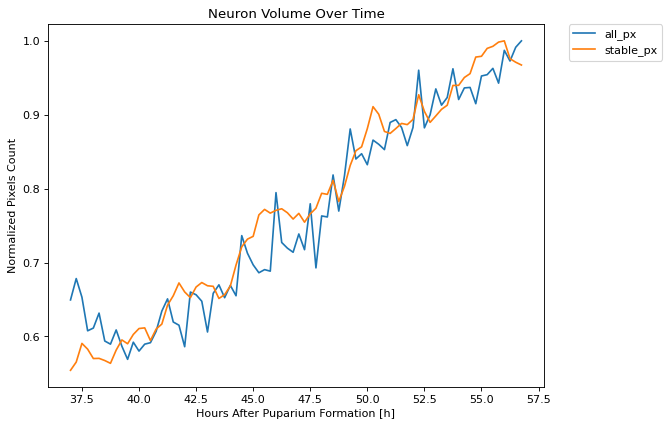

In [11]:
fig_name = save_path+save_name+'_Volume.pdf'
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(output_results.timepoints[4:],output_results.vol_all[4:]/output_results.vol_all.max(), label='all_px')
plt.plot(output_results.timepoints[4:],output_results.vol_stable[4:]/output_results.vol_stable.max(), label='stable_px')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Neuron Volume Over Time')
plt.ylabel('Normalized Pixels Count')
plt.xlabel("Hours After Puparium Formation [h]")
plt.savefig(fig_name, bbox_inches='tight')




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


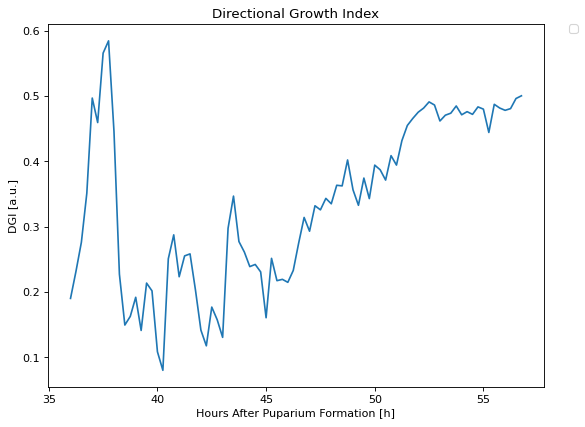

In [12]:
fig_name = save_path+save_name+'_DGI.pdf'
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(output_results.timepoints,output_results.DGI)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Directional Growth Index')
plt.ylabel('DGI [a.u.]')
plt.xlabel("Hours After Puparium Formation [h]")
plt.savefig(fig_name, bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


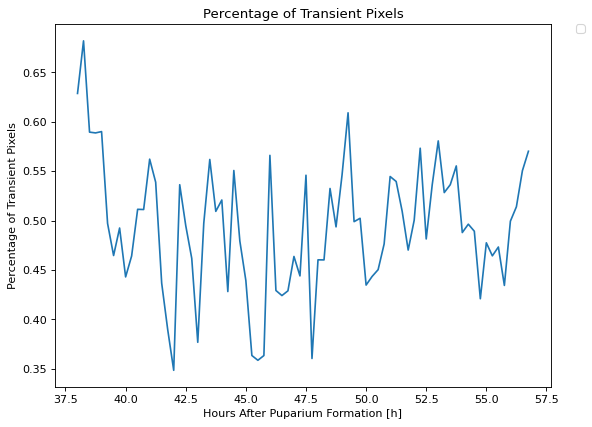

In [13]:
fig_name = save_path+save_name+'_trans_per.pdf'
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(output_results.timepoints[8:],output_results.trans_per[8:])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Percentage of Transient Pixels')
plt.ylabel('Percentage of Transient Pixels')
plt.xlabel("Hours After Puparium Formation [h]")
plt.savefig(fig_name, bbox_inches='tight')